In [8]:
# importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# reading the dataset
df = pd.read_csv('employee.csv')

# checking the first five 5 rows of the dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


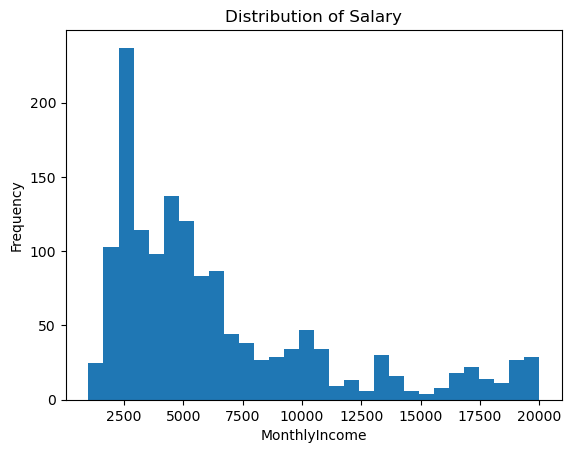

Mean:6502.93
Standard Deviation:4706.36


In [10]:
# checking the distribution of Monthly Income
MonthlyIncome = df['MonthlyIncome']

# Plotting histogram
plt.hist(MonthlyIncome, bins=30)
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.show()

# Calculating mean and standard deviation
mean = np.mean(MonthlyIncome)
std_dev = np.std(MonthlyIncome)

print("Mean:{0:.2f}".format(mean))
print("Standard Deviation:{0:.2f}".format(std_dev))

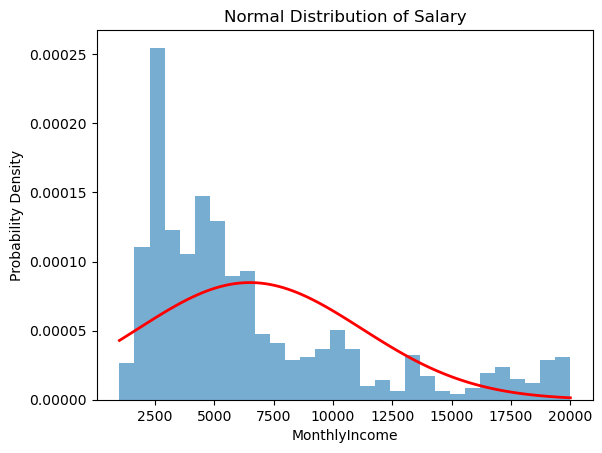

Mean:6502.93
Standard Deviation:4706.36


In [11]:
from scipy.stats import norm

# Fit a normal distribution
mu, sigma = norm.fit(MonthlyIncome)

# Plotting the histogram and fitted normal distribution
plt.hist(MonthlyIncome, bins=30, density=True, alpha=0.6)
x = np.linspace(min(MonthlyIncome), max(MonthlyIncome), 100)
plt.plot(x, norm.pdf(x, mu, sigma),'r-', linewidth=2)


plt.xlabel('MonthlyIncome')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Salary')
plt.show()

print("Mean:{0:.2f}".format(mean))
print("Standard Deviation:{0:.2f}".format(std_dev))

## Skewness and Kurtosis

Skewness is a measure of the asymmetry of a distribution. A positive skewness indicates a longer tail on the right side of the distribution, while a negative skewness indicates a longer tail on the left side. A skewness value of zero suggests a symmetric distribution.

Kurtosis measures the shape of a distribution by assessing the tails and the concentration of data near the mean. Positive kurtosis indicates heavy tails and a higher peak compared to a normal distribution, while negative kurtosis indicates lighter tails and a flatter peak. A kurtosis value of zero suggests a normal distribution.

In [12]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = skew(MonthlyIncome)
kurt = kurtosis(MonthlyIncome)

print("Skewness: {0:.2f}".format(skewness))
print("Kurtosis: {0:.2f}".format(kurt))

Skewness: 1.37
Kurtosis: 1.00


## Statistical Transformations

Statistical transformations, also known as data transformations, are mathematical operations applied to data in order to alter its distribution, reduce skewness, or achieve other desirable properties. They are commonly used in data science for various reasons. Let's explore some specific types of statistical transformations and why they are important.

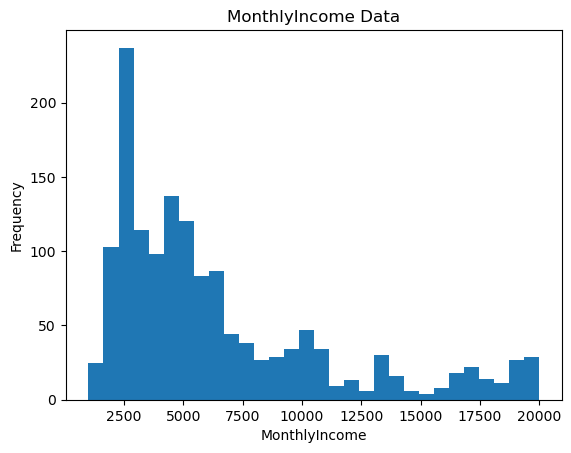

In [14]:
# Original data visualization

plt.hist(MonthlyIncome, bins=30)
plt.title('MonthlyIncome Data')
plt.xlabel('MonthlyIncome')
plt.ylabel('Frequency')
plt.show()

### Square Root Transformation:
The square root transformation involves taking the square root of each data point. It is useful for reducing the right skewness of a positively skewed distribution. By compressing larger values more than smaller values, it helps normalize the data and make it more symmetrical.


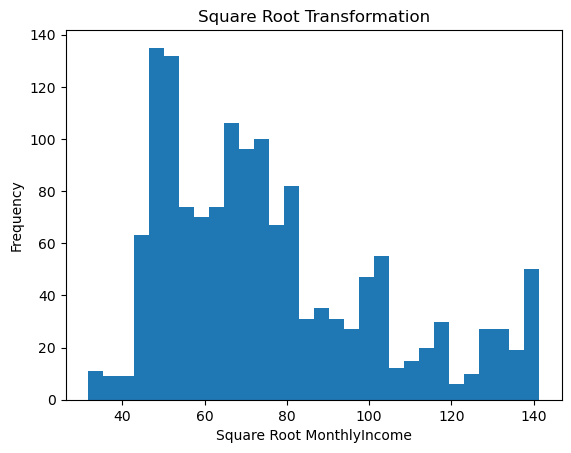

In [15]:
# Square root transformation

plt.hist(np.sqrt(MonthlyIncome), bins=30)

plt.title('Square Root Transformation')
plt.xlabel('Square Root MonthlyIncome')
plt.ylabel('Frequency')

plt.show()

### Cube Root Transformation:
The cube root transformation involves taking the cube root of each data point. It also helps in reducing positive skewness, but to a greater extent compared to the square root transformation. It can be particularly effective when dealing with data that contains both positive and negative values.

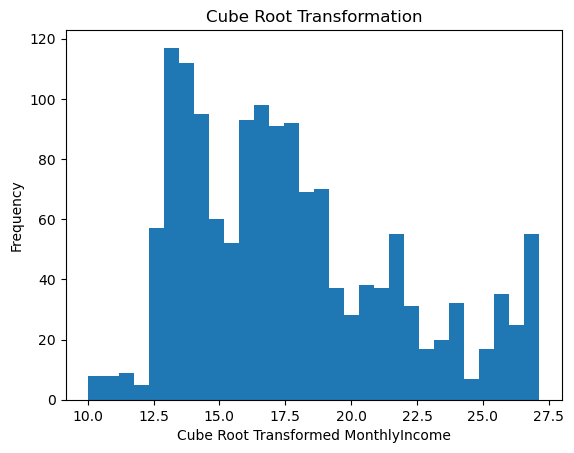

In [16]:
# Cube root transformation

plt.hist(np.power(MonthlyIncome, 1/3), bins=30)
plt.title('Cube Root Transformation')
plt.xlabel('Cube Root Transformed MonthlyIncome')
plt.ylabel('Frequency')

plt.show()

### Log Transformation:
The log transformation involves taking the logarithm of each data point. It is commonly used when the data has a highly skewed distribution, especially with a long right tail. The log transformation compresses the large values more than the smaller values, reducing the range and making the distribution more symmetric.

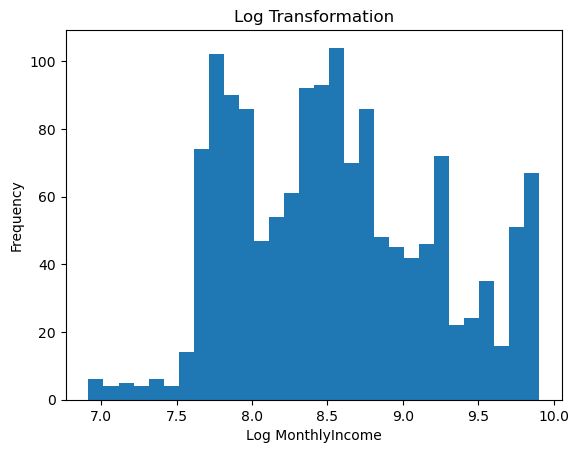

In [17]:
# Log transformation

plt.hist(np.log(MonthlyIncome), bins=30)
plt.title('Log Transformation')
plt.xlabel('Log MonthlyIncome')
plt.ylabel('Frequency')

plt.show()

### Box-Cox Transformation:
The Box-Cox transformation is a more general transformation technique that includes both the square root and log transformations as special cases. It is designed to find the best power transformation parameter, lambda (λ), to achieve the most desirable distribution properties. The Box-Cox transformation can handle various types of skewness and can be applied to both positive and negative values.

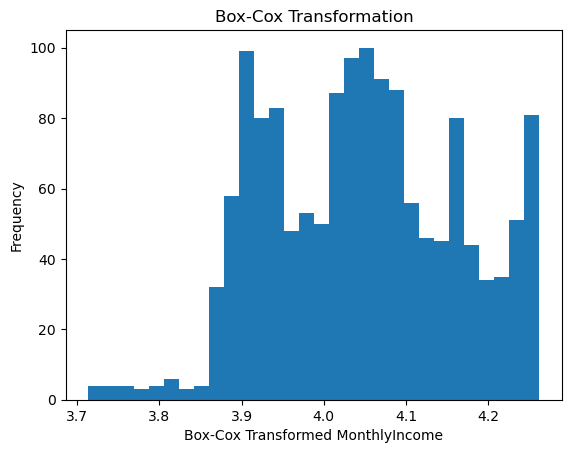

In [18]:
from scipy import stats

# Box-Cox transformation
boxcox_MonthlyIncome, _ = stats.boxcox(MonthlyIncome)
plt.hist(boxcox_MonthlyIncome, bins=30)
plt.title('Box-Cox Transformation')
plt.xlabel('Box-Cox Transformed MonthlyIncome')
plt.ylabel('Frequency')
plt.show()